In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [3]:
path = "c:/Windows/Fonts/malgun.ttf"


import platform
from matplotlib import font_manager, rc


font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)



plt.rcParams['axes.unicode_minus'] = False

In [4]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv',
                           encoding='utf-8', 
                           thousands=',',
                           names = ['date','hit'],
                           index_col=0)

pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]

pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


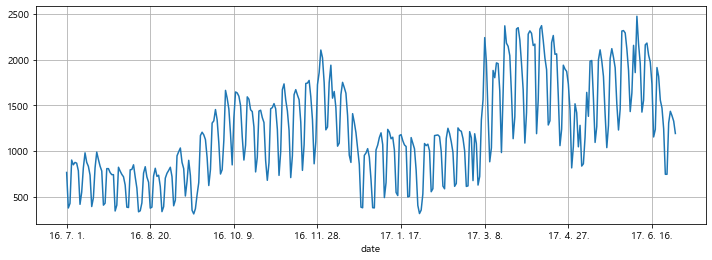

In [5]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [6]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [7]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [8]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.62841018946943
429.5328046676293
330.4777304274343


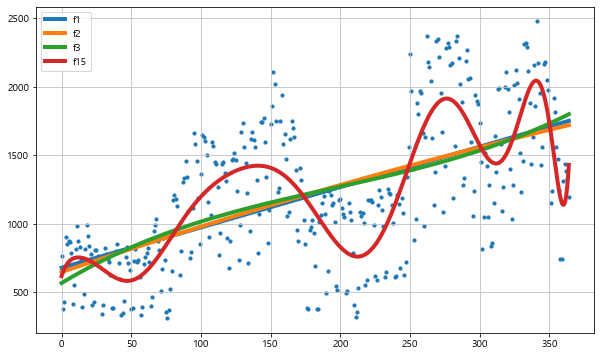

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

In [10]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [11]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,911.790860,705.480662,1115.649248
421,2017-08-26,496.917939,289.745773,706.052395
422,2017-08-27,629.458439,420.420322,829.079417
423,2017-08-28,1181.938386,980.109659,1387.393625
424,2017-08-29,1217.864960,1004.826224,1425.629953


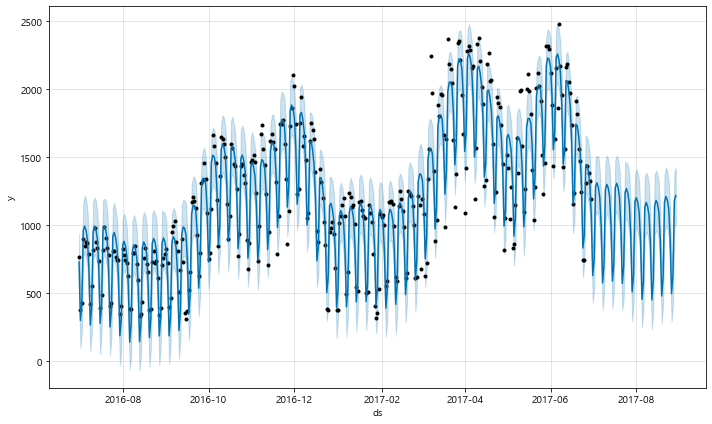

In [13]:
m.plot(forecast);

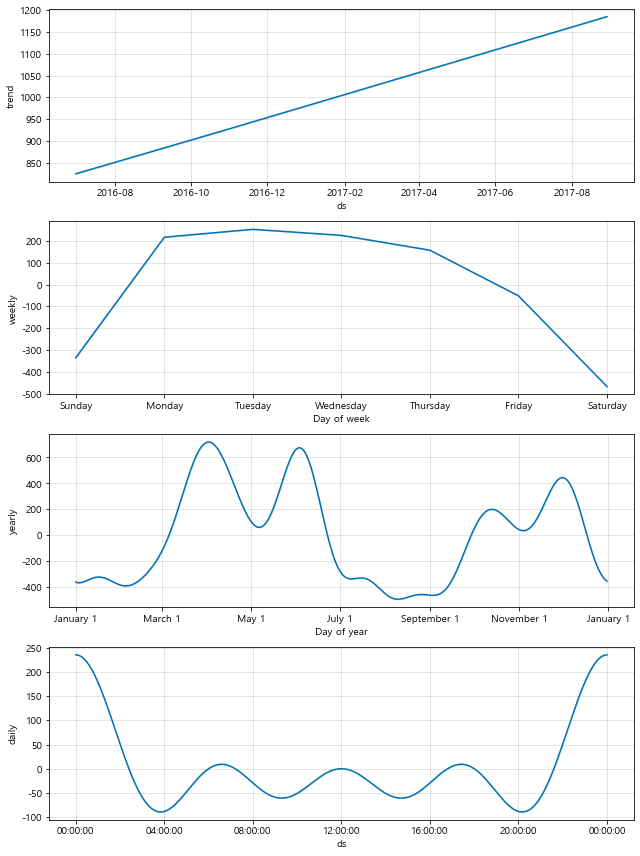

In [14]:
m.plot_components(forecast);

In [23]:
from pandas_datareader import data
import yfinance as yf

yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2021-2-11' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.519043,7665.241699,7300.229980,7665.241699,5565.034668,636300
2000-01-05,7404.519043,7404.519043,7248.085449,7248.085449,5262.176758,686100
2000-01-06,7331.516602,7519.236816,6935.218262,6935.218262,5035.031738,379000
2000-01-07,6987.362793,7143.796387,6778.785156,6778.785156,4921.458984,701400
2000-01-10,6841.358398,7102.081055,6810.071777,7091.651855,5148.604004,1076700


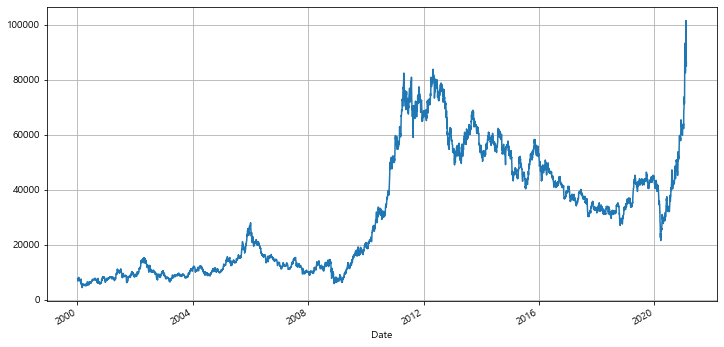

In [24]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [25]:
KIA_trunc = KIA[:'2020-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.519043,7665.241699,7300.229980,7665.241699,5565.034668,636300
2000-01-05,7404.519043,7404.519043,7248.085449,7248.085449,5262.176758,686100
2000-01-06,7331.516602,7519.236816,6935.218262,6935.218262,5035.031738,379000
2000-01-07,6987.362793,7143.796387,6778.785156,6778.785156,4921.458984,701400
2000-01-10,6841.358398,7102.081055,6810.071777,7091.651855,5148.604004,1076700
...,...,...,...,...,...,...
2020-12-23,60000.000000,62000.000000,59500.000000,61400.000000,60422.292969,1658263
2020-12-24,61800.000000,62800.000000,61200.000000,61700.000000,60717.515625,1271051
2020-12-28,62200.000000,63700.000000,61700.000000,62800.000000,61800.000000,2282079


In [26]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.241699
1,2000-01-05,7248.085449
2,2000-01-06,6935.218262
3,2000-01-07,6778.785156
4,2000-01-10,7091.651855


In [27]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [28]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5634,2021-12-26
5635,2021-12-27
5636,2021-12-28
5637,2021-12-29
5638,2021-12-30


In [29]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5634,2021-12-26,41671.162062,33665.585228,49687.766000
5635,2021-12-27,41399.695169,33574.482339,49871.569372
5636,2021-12-28,41434.070448,33309.977413,49467.512249
5637,2021-12-29,41333.002655,32950.789804,49751.183915
5638,2021-12-30,41197.690684,33080.992998,49178.067876


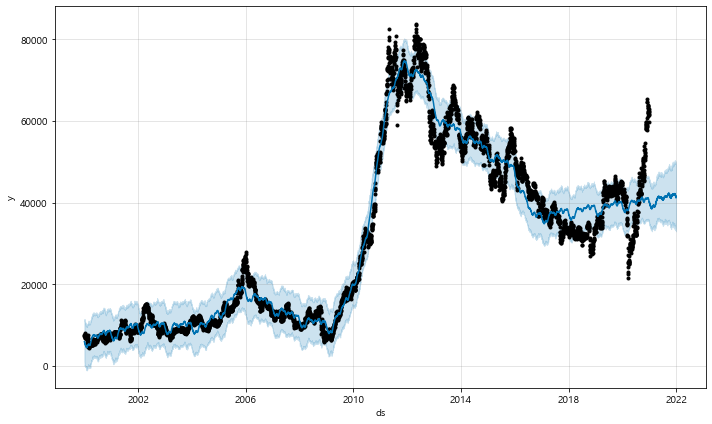

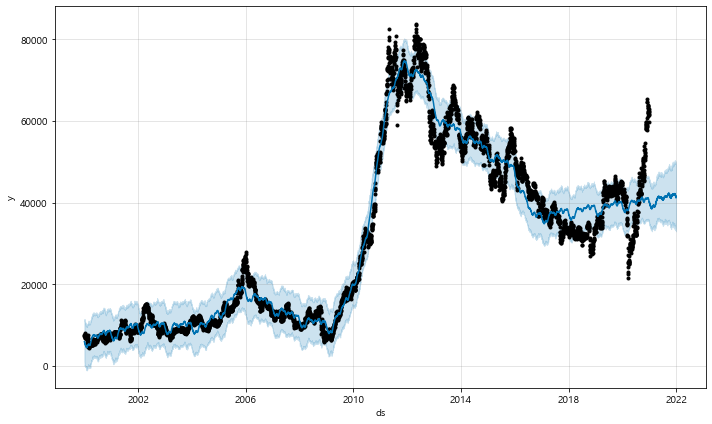

In [30]:
m.plot(forecast)

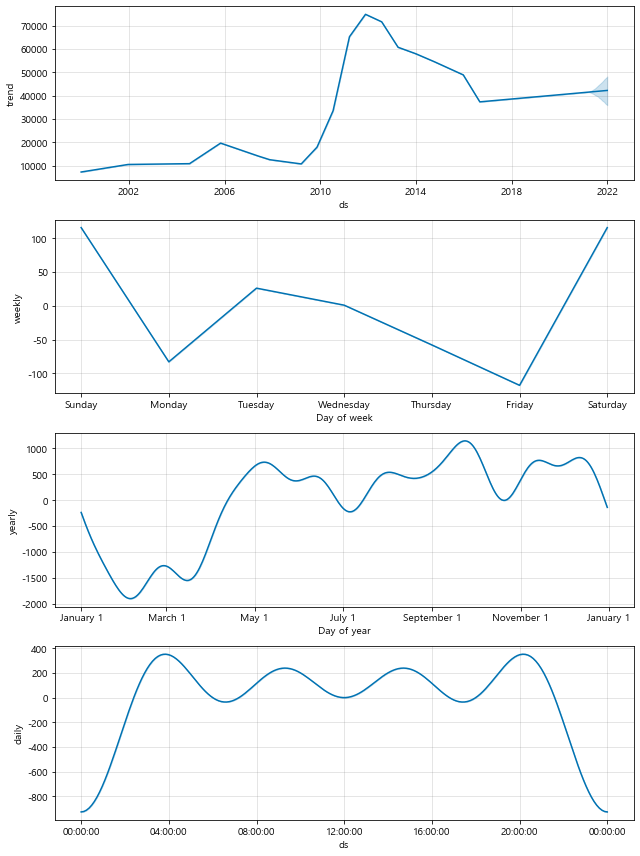

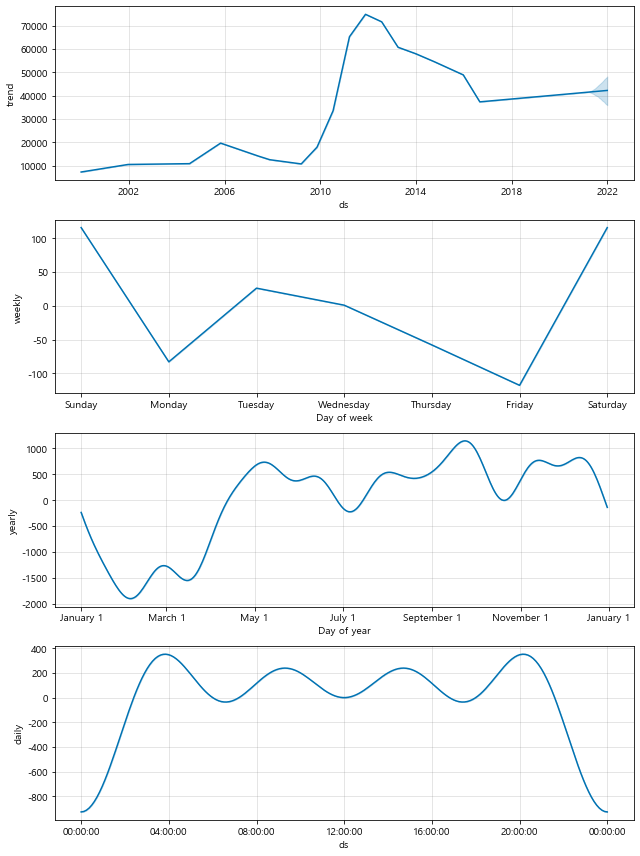

In [31]:
m.plot_components(forecast)

[*********************100%***********************]  1 of 1 completed


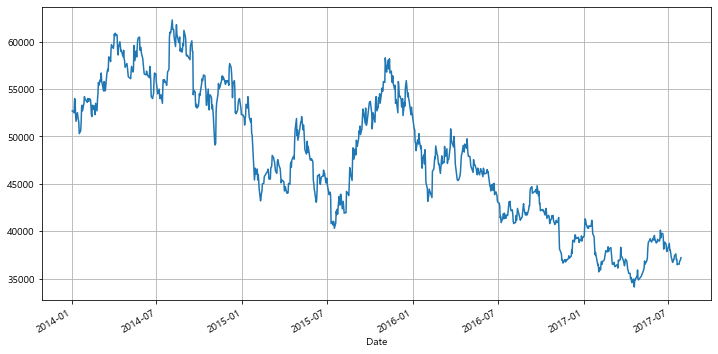

In [32]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

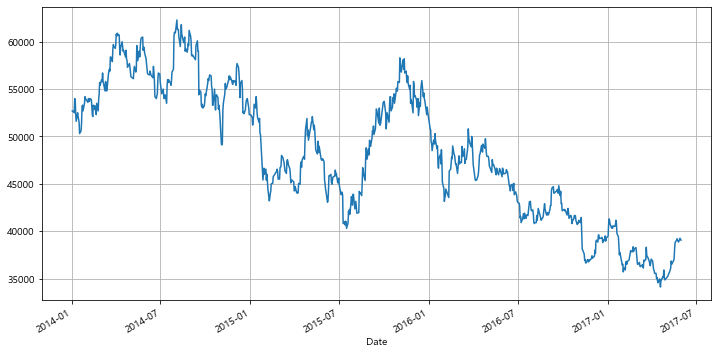

In [33]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [34]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [36]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [37]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


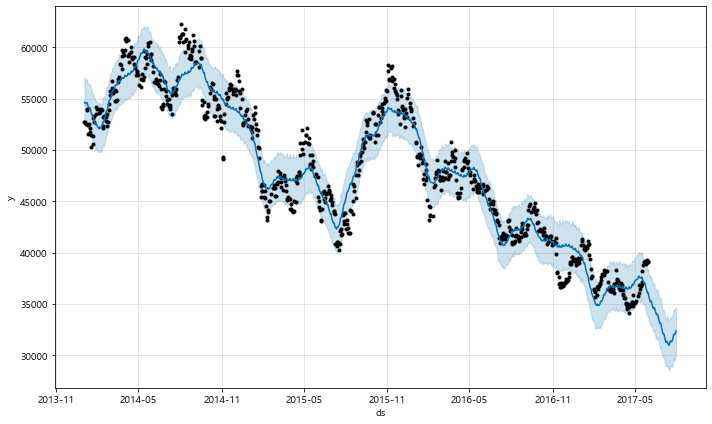

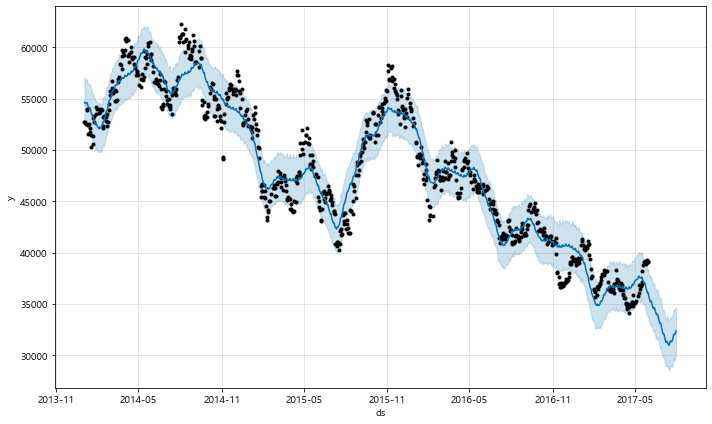

In [39]:
forecast = m.predict(future)
m.plot(forecast)

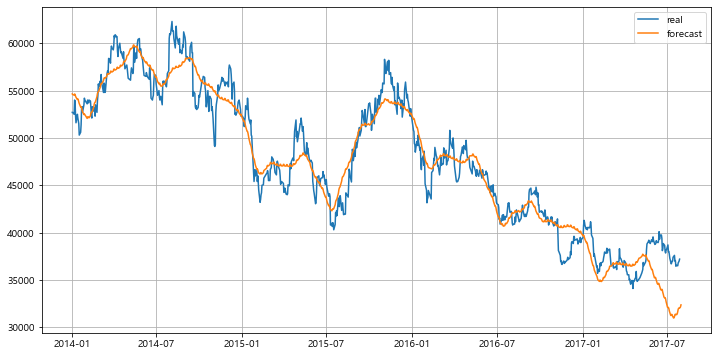

In [40]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [63]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [64]:
df['cap'] = 8.5

In [ ]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst)

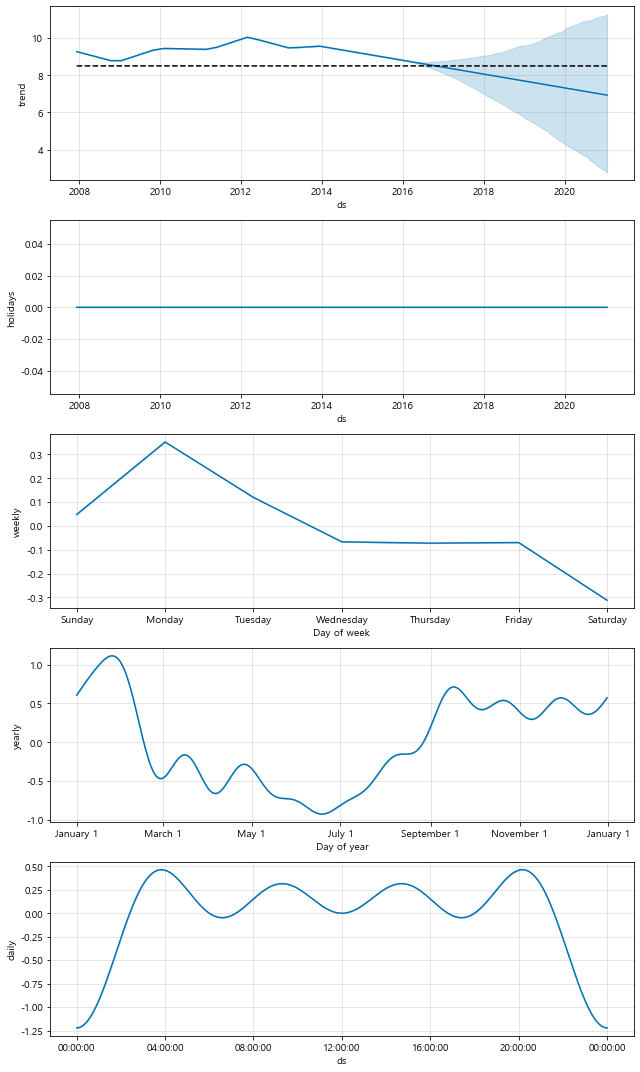

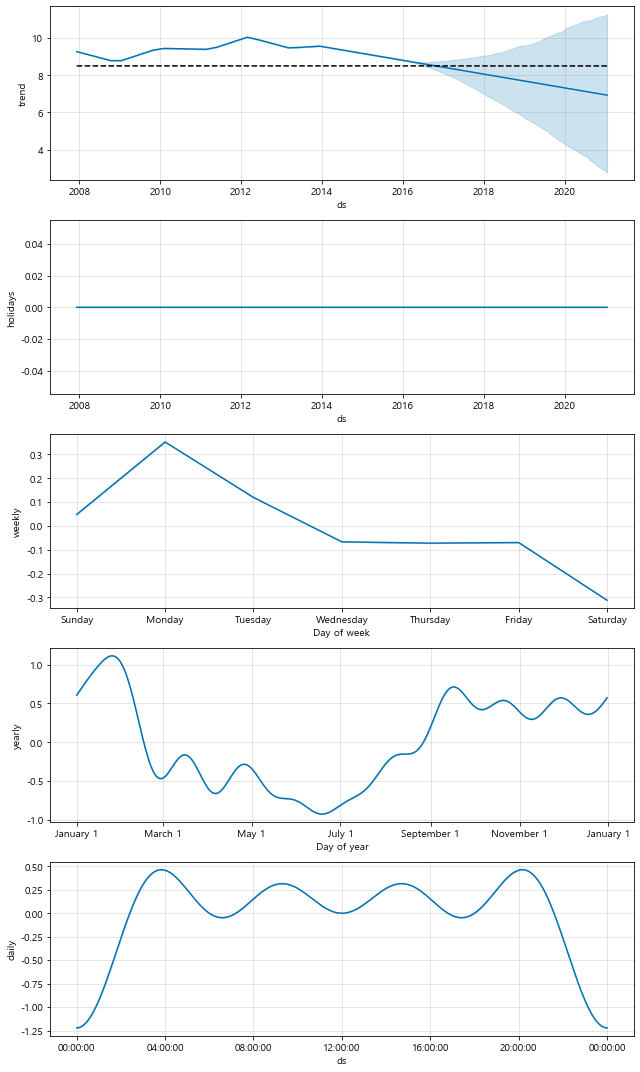

In [58]:
forecast = m.predict(future)
m.plot_components(forecast)

In [59]:
df = pd.read_csv('../data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

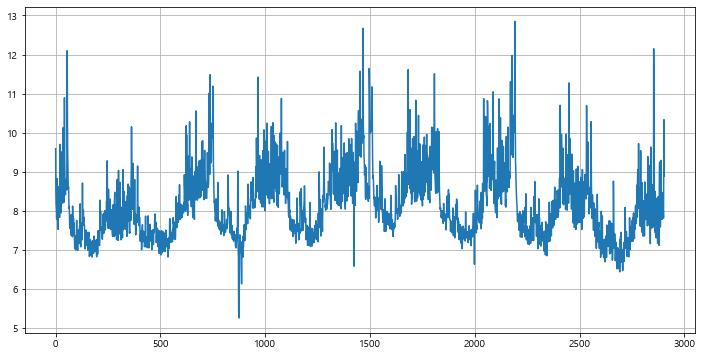

In [60]:
df.y.plot(figsize=(12,6), grid=True)

In [61]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [62]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [52]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl


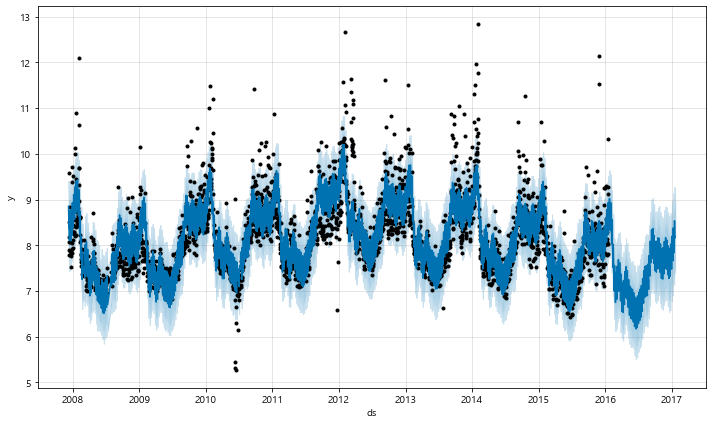

In [53]:
m.plot(forecast);

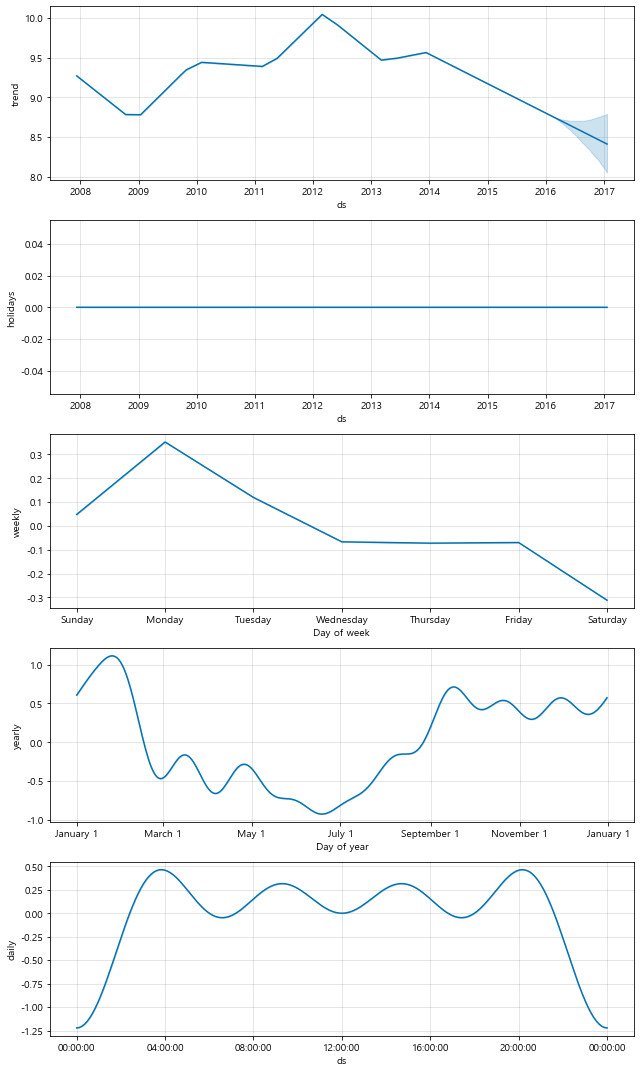

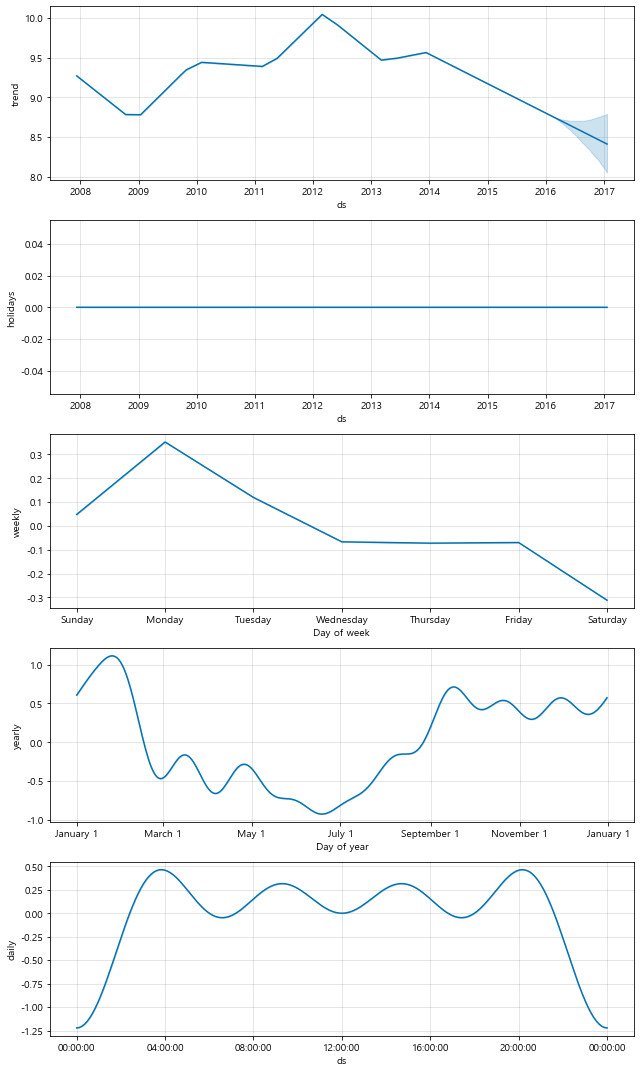

In [54]:
m.plot_components(forecast)